# 1.1 Structure

#### Passive Learning Methods
* Factorial Design
* Random Sampled Designs

#### Active Learning Methods
* Information Based Methods
* BLR/Gaussian Processes
* MCMC


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import initial_designs_demo
%matplotlib notebook
plt.close()

In [2]:
import imp

# 2.1 Passive Designs
* Initial Design of Experiments
    * Typically concerned with identificaiton of sensitivity of a chosen output to a given set of inputs

## 2.2 Factorial Designs
* Superior in characterizing the sensitivity of a response variable (Y) to individual changes in the input variables (x). (We note that the input variables X are refered to as factors which may themselves have variability in experiments)

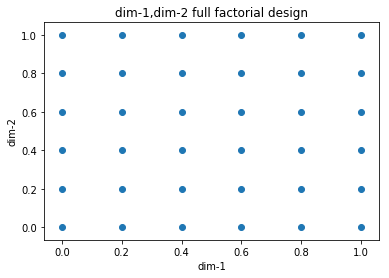

In [3]:
import imp
#import initial_designs_demo
n=6 #number of levels to consider per factor (can be integer or list)
d=2 #number of factors to consider
# These types of designs have n^2 points
# They were seen as superior to "single factor designs" since they take into account the changes at
# multiple "levels"
factorial,fig2=initial_designs_demo.factorial_design(n,d,plot_=True)
#fig.show()
#fig2.show()

## 2.2 LHD Design
* LHD Design is a subset of set theory dealing with Orthogonal Arrays
* LHD designs are superior in capturing the mean response variable (Y) for given input variables (x) 
(in computer experiments there is often no distribution about these parameters, 
 i.e. deterministic so this is often the choice for design of computer experiments)
* LHD designs are typically superior for establishing models
* First Establish a Latin Cube, than use stratified random sampling

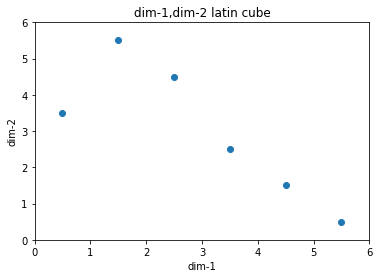

In [2]:
import imp
imp.reload(initial_designs_demo)
#import initial_designs_demo
n=6 #number of levels to consider per factor (can be integer or list)
d=2 #number of factors to consider
# These types of designs have n^2 points
# They were seen as superior to "single factor designs" since they take into account the changes at
# multiple "levels"
latin_cube,fig=initial_designs_demo.latin_cube(n,d,plot_=True)
#fig.show()

In [ ]:
#import imp
#imp.reload(initial_designs_demo)
#import initial_designs_demo
n=20 #number of levels to consider per factor (can be integer or list)
d=2 #number of factors to consider
# These types of designs have n^2 points
# They were seen as superior to "single factor designs" since they take into account the changes at
# multiple "levels"
LHD,fig3=initial_designs_demo.LHD_design(n,d,plot_=True)
fig3.show()

### 2.2.1 Question Time
* Think of situations which a Latin Hyper Cube design would provide an unfavorable design
* Why Might that Be??
* What could we do to improve these designs??

## 2.3 Random Designs
* Random Designs are more efficient if the goal is to build a model to 

** We also note since the output of computer simulations is deterministic there is little to gain from the repetition of an input (since there is no distribution of the actual output)


### 2.3 Random Sampling 
* First Approach to compare against LHD,however we should think of this to be evaluated with respect to a fixed design point (with a varying input)
* Typically random sampling is best performed when the input distribution 
is known 
* We can randomly sample from a distribution to compute the expectation and estimate the variance... i.e. the monte carlo approximation

$ E(x)\approx \frac{1}{N} \sum_{i=1}^N X_i $

recall

$ E(x) = \int_x x p(x) dx $

where $p(x)$ probability density,
In lower dimensional problems an "inverse cdf" can be used to sample from known distributions
In higher dimensional problems MCMC can be used to generate samples from multivariate distributions

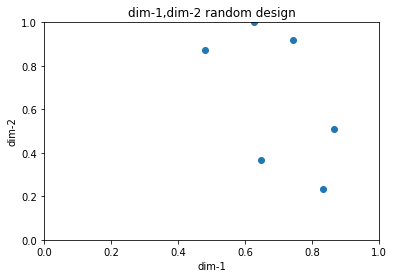

In [4]:
import imp
imp.reload(initial_designs_demo)
#import initial_designs_demo
n=6 #number of levels to consider per factor (can be integer or list)
d=3 #number of factors to consider
# These types of designs have n^2 points
# They were seen as superior to "single factor designs" since they take into account the changes at
# multiple "levels"
randomD,fig=initial_designs_demo.random_design(n,d,plot_=True)
fig.show()

## 3.1 Testing Different Designs and Modifications to designs

### Franke's Function
* Typical test functions for interpolation problems
* Use Factorial, LHD, and Random Designs for initial training set


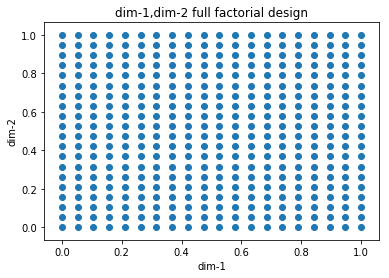

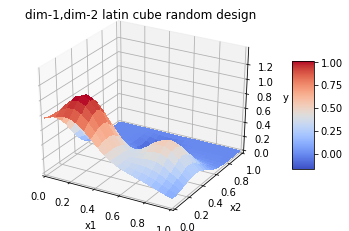

In [5]:
imp.reload(initial_designs_demo)
Y=initial_designs_demo.frankes_func
n=20 #20 levels per factor
d=2  #2  factors
x,fig1=initial_designs_demo.factorial_design(n=20,d=2,plot_=True)
#print(x)
x_test=x
Y_test=Y(x_test,plot_=True)

# 3.3 Back To GPs
* We can fit a gaussian process to Franke's function using various initializations. It is desirable to use less points in order to fit a model (attractive especially if simulations are very expensive)

* Certain LHD designs should be optimal in this choice, some will be terrible, there are methods to ensure this, or alter existing designs (see R-software, matlab for built in functions)


### 3.4 Gaussian Processes
* Non parametric model based on a similarity function
* GPs provides us a tool for nonlinear interpolation which gives us confidence bounds 
* GPs also give us an expression in which we shift our focus to the optimization of hyperparameters
* Formulas for prediction of the mean, and variance at a new location $x$ is given below
\begin{align}
m (x)= k(x,x_i){C_{ij}}y_j
\end{align}

\begin{align}
\sigma^2 (x)= k(x,x)-k(x,x_i){C_{ij}}k(x,x_j)
\end{align}

\begin{align}
k(x,x_i)=exp \Big( -\frac{||x-x_i||^2}{l} \Big)
\end{align}

\begin{align}
\pmb{K} = K_{ij}=k(x_i,x_j)= exp \Big( -\frac{||x_i-x_j||^2}{l} \Big)
\end{align}

\begin{align}
\pmb{C} = \pmb{K}^{-1} = C_{ij}
\end{align}

$i$,$j$ enumerates the $N$ available training data

NOTE: we chose a very simple covariance/similarity function, $k(x,x')$, others exist with more hyper parameters, and flexibility.

In [ ]:
import GaussianProcessRegression as gpr

In [ ]:
### Choose training type
n=20
d=2
#D1,f1=initial_designs_demo.factorial_design(n=20,d=2,plot_=False) # produces n^2 training points to evaluate
D2,f2=initial_designs_demo.LHD_design(n=20,d=2,plot_=False) # produces  n training points
#D3,f3=initial_designs_demo.random_design(n=20,d=2,plot_=False) # produces  n training points

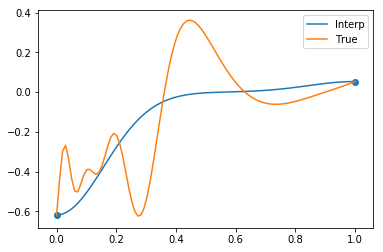

In [32]:
plt.close("all")

## Specify initial hyperparameters
l=0.1  #0.17 works well
mu=0   #nugget term, 0 enforces interpolation

## Specify Training data
xtrain=D2 #change the training set here
ytrain=Y(xtrain)

## Specify Model, set hyperparameters
GPmodel=gpr.gpprocess()
GPmodel.traindata(xtrain,ytrain)
GPmodel.rbfbasis(l=l)
GPmodel.mu=0
GPmodel.trainGP() #first train

## Optimize
GPmodel.optimize() #optimize loglikelihood wrt lengthscale parameter
GPmodel.trainGP()  #retrain with updated parameters

## Evaluate at test points across parameter space
ypred,yvar=GPmodel.eval(x_test)
print(np.mean(np.abs(ypred-Ytest)))

In [ ]:
## Now plot the error
initial_designs_demo.parity_plot()

* We can try different interpolation techniques to see how they perform in fitting the unknown function (orange). Try polynomial basis as well as rbfbasis to see how interpolation for this strange unknown function is.

In [4]:
plt.close("all")
import class_demos
imp.reload(GP)

## Specify the number of points sampled
N=7    #start with 7
l=0.0053  #start with 0.3

## Generate data
f=class_demos.testfuncgp() #same function from above
xtrain=np.linspace(0,1,N)
ytrain=f(xtrain)

## Specify model
GPmodel=GP.gpprocess()
GPmodel.traindata(xtrain,ytrain)
GPmodel.rbfbasis(l=l) #set length scale parameter and set similarity function
GPmodel.mu=0 #simplify the problem
GPmodel.trainGP()

NameError: name 'GP' is not defined

In [5]:
# Plot true function values versus predictions from GP
GPmodel.ftrue=f
GPmodel.plottrue()

NameError: name 'f' is not defined

## 3.5 Hyperparameter optimization for GPs
* By casting the problem stochasically, a process followed similar from BLR allows us to formulate an expression of the likelihood of the hyperparameters for the given data. We continue to maximize the likelihood with respect to the parameters within the covariance function.

\begin{align*}
 ln\ p(\pmb{y}|\pmb{X},l) = -\frac{1}{2} y_iC_{ij}y_j-\frac{1}{2}ln|\pmb{K}|-\frac{N}{2} ln(2\pi)
\end{align*}

Optimization terminated successfully.
         Current function value: -95.407791
         Iterations: 11
         Function evaluations: 22
Updating Hyperparameters
Training GP


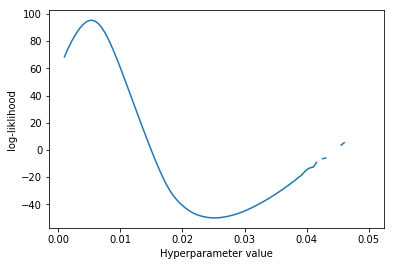

Optimal Solution for hyperparameter l is 0.0053


In [96]:
plt.close("all")
# Maximize the logliklihood with respect the hyperparameter,l
GPmodel.optimize()
print('Optimal Solution for hyperparameter l is %.4f' % GPmodel.l)

In [45]:
GPmodel.l #check for update

0.02185546874999923

* Note: we actually minimize the negative logliklihood for simplicity of algo implementation, this is why function value is negative